In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(19)

In [21]:
def data_power_consumption(path_to_dataset = 'D:/data/household_power_consumption.txt', 
                           sequence_length = 50, ratio = 1.0):
    
    max_values = ratio * 2049280
    
    with open(path_to_dataset) as f:
        data = csv.reader(f, delimiter = ';')
        power = []
        nb_of_values = 0
        
        for line in data:
            try:
                power.append(float(line[2]))
                nb_of_values += 1
            except ValueError:
                pass
            
            if nb_of_values / 2049280.0 >= ratio:
                break
                
    result = []
    
    for index in range(len(power) - sequence_length):
        result.append(power[index: index + sequence_length])
        
    result = np.array(result)
    
    result_mean = result.mean()
    result -= result_mean
    
    print('Shift: ', result_mean)
    print('Data: ', result.shape)
    
    row = int(round(0.9 * result.shape[0]))
    train = result[:row, :]
    np.random.shuffle(train)
    
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = result[row:, :-1]
    y_test = result[row:, -1]
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return [X_train, y_train, X_test, y_test]

In [27]:
def build_model():
    
    model = Sequential()
    layers = [1, 50, 100, 1]
    
    model.add(LSTM(layers[1], input_shape = (None, 1), return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(layers[2], return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(layers[3]))
    model.add(Activation('linear'))
    
    start = time.time()
    model.compile(loss = 'mse', optimizer = 'rmsprop')
    print('Compilation time: {}'.format(time.time() - start))
    
    return model

def run_network(model = None, data = None):
    global_start_time = time.time()
    epochs = 3
    ratio = 0.5
    path_to_dataset = 'D:/data/household_power_consumption.txt'
    
    if data is None:
        print('Loading data.....')
        X_train, y_train, X_test, y_test = data_power_consumption(path_to_dataset)
                                            
    else:
        X_train, y_train, X_test, y_test = data
        
    print('Data Loaded \n Compiling....')
    
    if model is None:
        model = build_model()
        
    try:
        model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, validation_split = 0.10)
        predicted = model.predict(X_test)
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print('Training duration (seconds): ', time.time() - global_start_time)
        return model, y_test, 0
    
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(y_test[:100, 0])
        plt.plot(predicted[:100, 0])
        plt.show()
    except Exception as e:
        print(str(e))
        
    print('Training duration (seconds): ', time.time() - global_start_time)
    
    return model, y_test, predicted
    

In [28]:
model, y_test, predicted = run_network()

Loading data.....
Shift:  1.09157810417
Data:  (2049230, 50)
Data Loaded 
 Compiling....
Compilation time: 0.026999711990356445


C:\Users\vales\Anaconda3\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1659876 samples, validate on 184431 samples
Epoch 1/3
1659876/1659876 [==============================] - 605s - loss: 0.0831 - val_loss: 0.0711
Epoch 2/3
1659876/1659876 [==============================] - 601s - loss: 0.0726 - val_loss: 0.0699
Epoch 3/3
1659876/1659876 [==============================] - 604s - loss: 0.0703 - val_loss: 0.0640
too many indices for array
Training duration (seconds):  2046.9878125190735


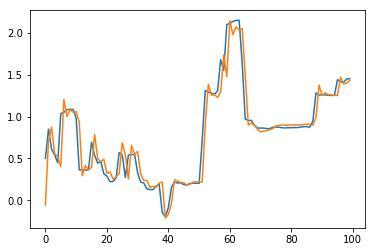

In [39]:
x = np.arange(100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_test[:100,])
plt.plot(x, predicted[:100,])
plt.show()

In [31]:
predicted.shape

(204923,)

In [32]:
y_test.shape

(204923,)